

 ******** GENERATING GRAPH ********
from node 00: [[3, 5], [2, 5]]
from node 01: []
from node 02: [[4, 12], [7, 1]]
from node 03: [[7, 4], [4, 11]]
from node 04: [[5, 13], [7, 16], [2, 8], [6, 20]]
from node 05: [[6, 12], [1, 3], [3, 11], [7, 1]]
from node 06: []
from node 07: [[6, 18], [2, 7]]


 ******** PERFORMING DIJKSTRA ********
Single-Pair Distance Table (from node 0): [0, 32, 5, 5, 16, 29, 24, 6]


 ******** PERFORMING FLOYD WARSHALL ********
All-Pairs Distance Table: 
from node 00: [0, 32, 5, 5, 16, 29, 24, 6]
from node 01: [inf, 0, inf, inf, inf, inf, inf, inf]
from node 02: [inf, 28, 0, 36, 12, 25, 19, 1]
from node 03: [inf, 27, 11, 0, 11, 24, 22, 4]
from node 04: [inf, 16, 8, 24, 0, 13, 20, 9]
from node 05: [inf, 3, 8, 11, 20, 0, 12, 1]
from node 06: [inf, inf, inf, inf, inf, inf, 0, inf]
from node 07: [inf, 35, 7, 43, 19, 32, 18, 0]


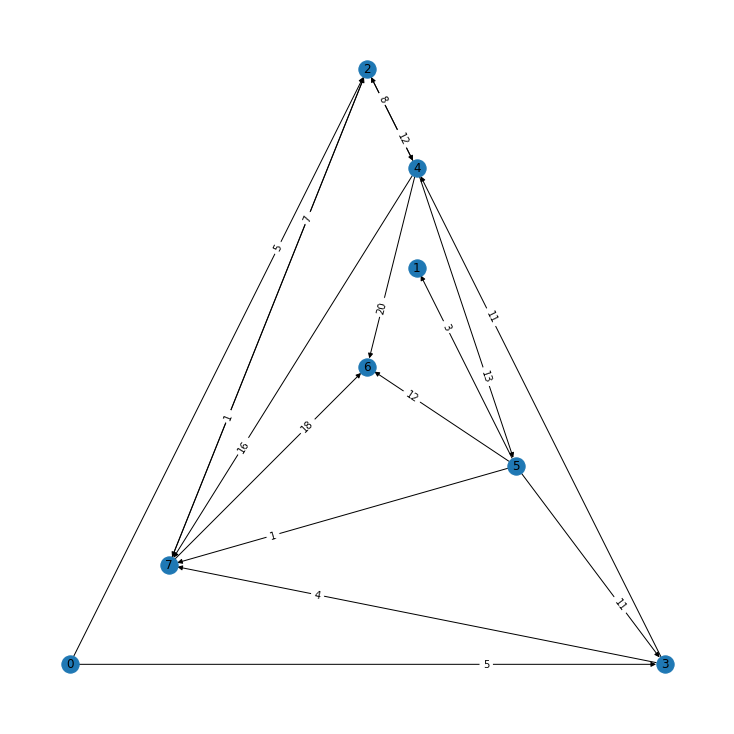

In [3]:
from random import randint
import math
import networkx as nx
import matplotlib.pyplot as plt

NODES = 8               # defines number of nodes in the graph
EDGES = 16             # defines number of edges in the graph
DIRECTED = True         # defines if the graph is directed or undirected
NEGATIVE_WEIGHT = False # defines if the edges can have negative weight
INFINITY = math.inf     # defines a variable for infinity


# function that implements the Dijkstra's algorithm for single-pair shortest paths
def dijkstra(graph, start_node):
    D = [INFINITY]*len(graph)
    n = len(graph)
    D[start_node] = 0
    cloud = [False]*len(graph)
    for i in range(n):
        # Get closest unvisited node
        d_min = v = None
        for j in range(n):
            if not cloud[j]:    # node j is unvisited
                if d_min is None:
                    d_min = D[j]
                    v = j
                    continue
                if D[j] < d_min:
                    d_min = D[j]
                    v = j
        cloud[v] = True  # Set node to visited
        # print(D, v)
        for edge in graph[v]:   # Go through all adjacent nodes to update distances 
            if not cloud[edge[0]]: # adjacent node to v is unvisited
                if D[v] + edge[1] < D[edge[0]]:
                    D[edge[0]] = D[v] + edge[1]
        # print(cloud, D)
        # Check if unvisited nodes can be reached. 
        # Otherwise, break from the loop.
        unvisited = [d for (d, c) in zip(D, cloud) if not c]    
        if all(e == INFINITY for e in unvisited):
            break

    return D
    

# function that implements the Floyd-Warshall's algorithm for all-pairs shortest paths
def floyd_warshall(graph):
    D = [[[ INFINITY for i in range(len(graph)) ] for j in range(len(graph)) ] for k in range(len(graph)+1) ]
    n = len(graph)
    # Initialize D table
    for i in range(n):
        D[0][i][i] = 0
        for node, weight in graph[i]:
            D[0][i][node] = weight

    # Loop to populate DP table in O(n^3) time
    for k in range(n):
        for i in range(n):
            for j in range(n):
                D[k + 1][i][j] = min(D[k][i][j], D[k][i][k] + D[k][k][j])

    return D[len(graph)][:][:]

    
# function that creates the graph
def make_graph(NUMBER_NODES, NUMBER_EDGES, NEGATIVE_WEIGHT, DIRECTED):
    if NODES*NODES<NUMBER_EDGES: 
        print("Impossible to generate a simple graph with %i nodes and %i edges!\n" %(NUMBER_NODES,NUMBER_EDGES))
        return None
    g = [[] for i in range(NUMBER_NODES)]
    for i in range(NUMBER_EDGES):
        while True:
            start_node = randint(0,NUMBER_NODES-1)
            end_node = randint(0,NUMBER_NODES-1)
            if NEGATIVE_WEIGHT: weight = randint(-20,20)
            else: weight = randint(1,20)
            if (start_node != end_node): 
                found = False
                for j in range(len(g[start_node])): 
                    if g[start_node][j][0] == end_node: found = True
                if not found: break            
        g[start_node].append([end_node, weight])
        if DIRECTED==False: g[end_node].append([start_node, weight])
    return g
 

# function that prints the graph
def print_graph(g, DIRECTED):
    if DIRECTED: G = nx.DiGraph()
    else: G = nx.Graph()
    for i in range(len(g)): G.add_node(i)
    for i in range(len(g)):
        for j in range(len(g[i])): G.add_edge(i,g[i][j][0],weight=g[i][j][1])
    for i in range(len(g)):
        print("from node %02i: " %(i),end="")
        print(g[i])
    try: 
        pos = nx.planar_layout(G)
        nx.draw(G,pos, with_labels=True)
    except nx.NetworkXException:
        print("\nGraph is not planar, using alternative representation")
        pos = nx.spring_layout(G)
        nx.draw(G,pos, with_labels=True)
    if DIRECTED: 
        labels=dict([((u,v,),d['weight']) for u,v,d in G.edges(data=True)])
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels, label_pos=0.3)
    else:
        labels = nx.get_edge_attributes(G,'weight')
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)



    
print("\n\n ******** GENERATING GRAPH ********" )     
g = make_graph(NODES,EDGES,NEGATIVE_WEIGHT,DIRECTED)
if g==None: raise SystemExit(0)
elif NODES<50 and EDGES<2500:
    plt.figure(1,figsize=(10,10))
    print_graph(g,DIRECTED)

print("\n\n ******** PERFORMING DIJKSTRA ********" )    
D = dijkstra(g,0)
print("Single-Pair Distance Table (from node 0): ",end="")
print(D)

print("\n\n ******** PERFORMING FLOYD WARSHALL ********" )   
D = floyd_warshall(g)
print("All-Pairs Distance Table: \n",end="")
for i in range(len(g)): 
    print("from node %02i: " %(i),end="")
    print(D[i])
